In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hb=pd.read_csv('headbrain.csv')
hb.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
hb.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [4]:
ts=pd.read_csv('tshirtcsv.csv')
ts.head()

,height,weight,t-shirt size
0,158,58,m
1,158,59,m
2,158,63,m
3,160,59,m
4,160,60,m


In [19]:
h1=161
w1=61
ts['distance']=((((h1-ts['height'])**2)+(w1-ts['weight'])**2)**0.5)
ts

,height,weight,t-shirt size,distance
0,158,58,m,4.242641
1,158,59,m,3.605551
2,158,63,m,3.605551
3,160,59,m,2.236068
4,160,60,m,1.414214
5,163,60,m,2.236068
6,163,61,m,2.000000
7,160,64,m,3.162278
8,165,64,l,5.000000
9,165,61,l,4.000000


In [30]:
h1=161
w1=61
li=[]
h=[158,158,160,163,163,160,163,163,165,165,168,168,170,170]
w=[58,59,63,59,60,60,61,64,64,61,62,65,62,66]
t=['m','m','m','m','m','m','m','m','l','l','l','l','l','l','l']
for i in range(0,len(h)):
    d=(((h1-h[i])**2)+((w1-w[i])**2))**0.5
    li.append(d)
print(li)

[4.242640687119285, 3.605551275463989, 2.23606797749979, 2.8284271247461903, 2.23606797749979, 1.4142135623730951, 2.0, 3.605551275463989, 5.0, 4.0, 7.0710678118654755, 8.06225774829855, 9.055385138137417, 10.295630140987]


In [25]:
import numpy as np
H=np.array(h)
W=np.array(w)
np.sqrt(((H-h1)**2)+((W-w1)**2))

array([ 4.24264069,  3.60555128,  2.23606798,  2.82842712,  2.23606798,
        1.41421356,  2.        ,  3.60555128,  5.        ,  4.        ,
        7.07106781,  8.06225775,  9.05538514, 10.29563014])

In [28]:
((ts['height']-h1)**2+(ts['weight']-w1)**2)**0.5

0      4.242641
1      3.605551
2      3.605551
3      2.236068
4      1.414214
5      2.236068
6      2.000000
7      3.162278
8      5.000000
9      4.000000
10     4.123106
11     8.062258
12     7.071068
13     9.219544
14    10.295630
dtype: float64

In [31]:
shirt=pd.DataFrame('Height':h,'Weight':w,'Size':t)
shirt

SyntaxError: invalid syntax (<ipython-input-31-3e287d7b102a>, line 1)

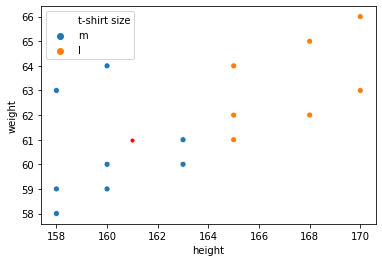

In [33]:
sns.scatterplot(x=ts['height'],y=ts['weight'],hue=ts['t-shirt size'])
plt.scatter(161,61,color='r',marker='.')

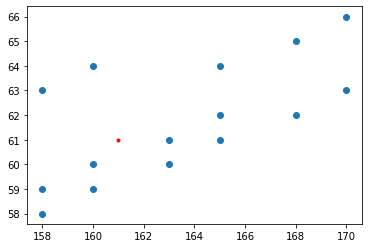

In [34]:
plt.scatter(ts['height'],ts['weight'])
plt.scatter(161,61,color='r',marker='.')

In [35]:
x=ts[['height','weight']]
y=ts['t-shirt size']

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
knn.predict([[161,61]])

array(['m'], dtype=object)

In [40]:
from sklearn.metrics import accuracy_score
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [53]:
hd=pd.read_csv('Heart_disease.csv',index_col=0)

In [54]:
hd.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [55]:
hd.shape

(303, 14)

In [56]:
hd.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [57]:
hd.duplicated().sum()

0

In [58]:
hd['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [60]:
hd.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [61]:
hd['AHD'].value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

In [62]:
hd.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [63]:
hd.dropna(inplace=True)

In [64]:
hd.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [66]:
hd.shape

(297, 14)

In [69]:
from sklearn.preprocessing import LabelEncoder
lbc=LabelEncoder()
hd['ChestPain']=lbc.fit_transform(hd['ChestPain'])
hd['Thal']=lbc.fit_transform(hd['Thal'])
hd['AHD']=lbc.fit_transform(hd['AHD'])

hd.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [70]:
x=hd.drop('AHD',axis=1)
y=hd['AHD']

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [73]:
x.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1


In [74]:
x_train.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
271,61,1,0,140,207,0,2,138,1,1.9,1,1.0,2
38,57,1,0,150,276,0,2,112,1,0.6,2,1.0,0
17,48,1,2,110,229,0,0,168,0,1.0,3,0.0,2
257,67,0,0,106,223,0,0,142,0,0.3,1,2.0,1
146,47,1,1,108,243,0,0,152,0,0.0,1,0.0,1


In [76]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred=lg.predict(x_test)

In [79]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1])

In [81]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_pred,y_test)
c

array([[45,  8],
       [ 4, 33]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred,y_test)

0.8666666666666667

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
from sklearn.metrics import accuracy_score 
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)


0.6888888888888889